# Custom map simulations

In this tutorial we will build a simulation from scratch.

We start by defining a `Band` that will determine our array's sensitivity to different spectra. We then generate an array by specifying a field of view, which will be populated by evenly-spaced beams of the given band.

In [1]:
import maria
from maria.instrument import Band

f090 = Band(
    center=90e9,  # in Hz
    width=20e9,  # in Hz
    NET_RJ=4e-5,  # in K sqrt(s)
    knee=1e0,    # in Hz
    gain_error=5e-2)

f150 = Band(
    center=150e9, 
    width=30e9, 
    NET_RJ=6e-5, 
    knee=1e0, 
    gain_error=5e-2)

Instrument(1 array)
├ arrays:
│             n           FOV baseline        bands
│  array1  1798  14.87 arcmin      0 m  [f090,f150]
│ 
└ bands:
          center   width    η         NEP   NET_RJ     NET_CMB
   f090   90 GHz  20 GHz  0.5  5.445 aW√s  40 uK√s  49.13 uK√s
   f150  150 GHz  30 GHz  0.5  12.25 aW√s  60 uK√s    104 uK√s


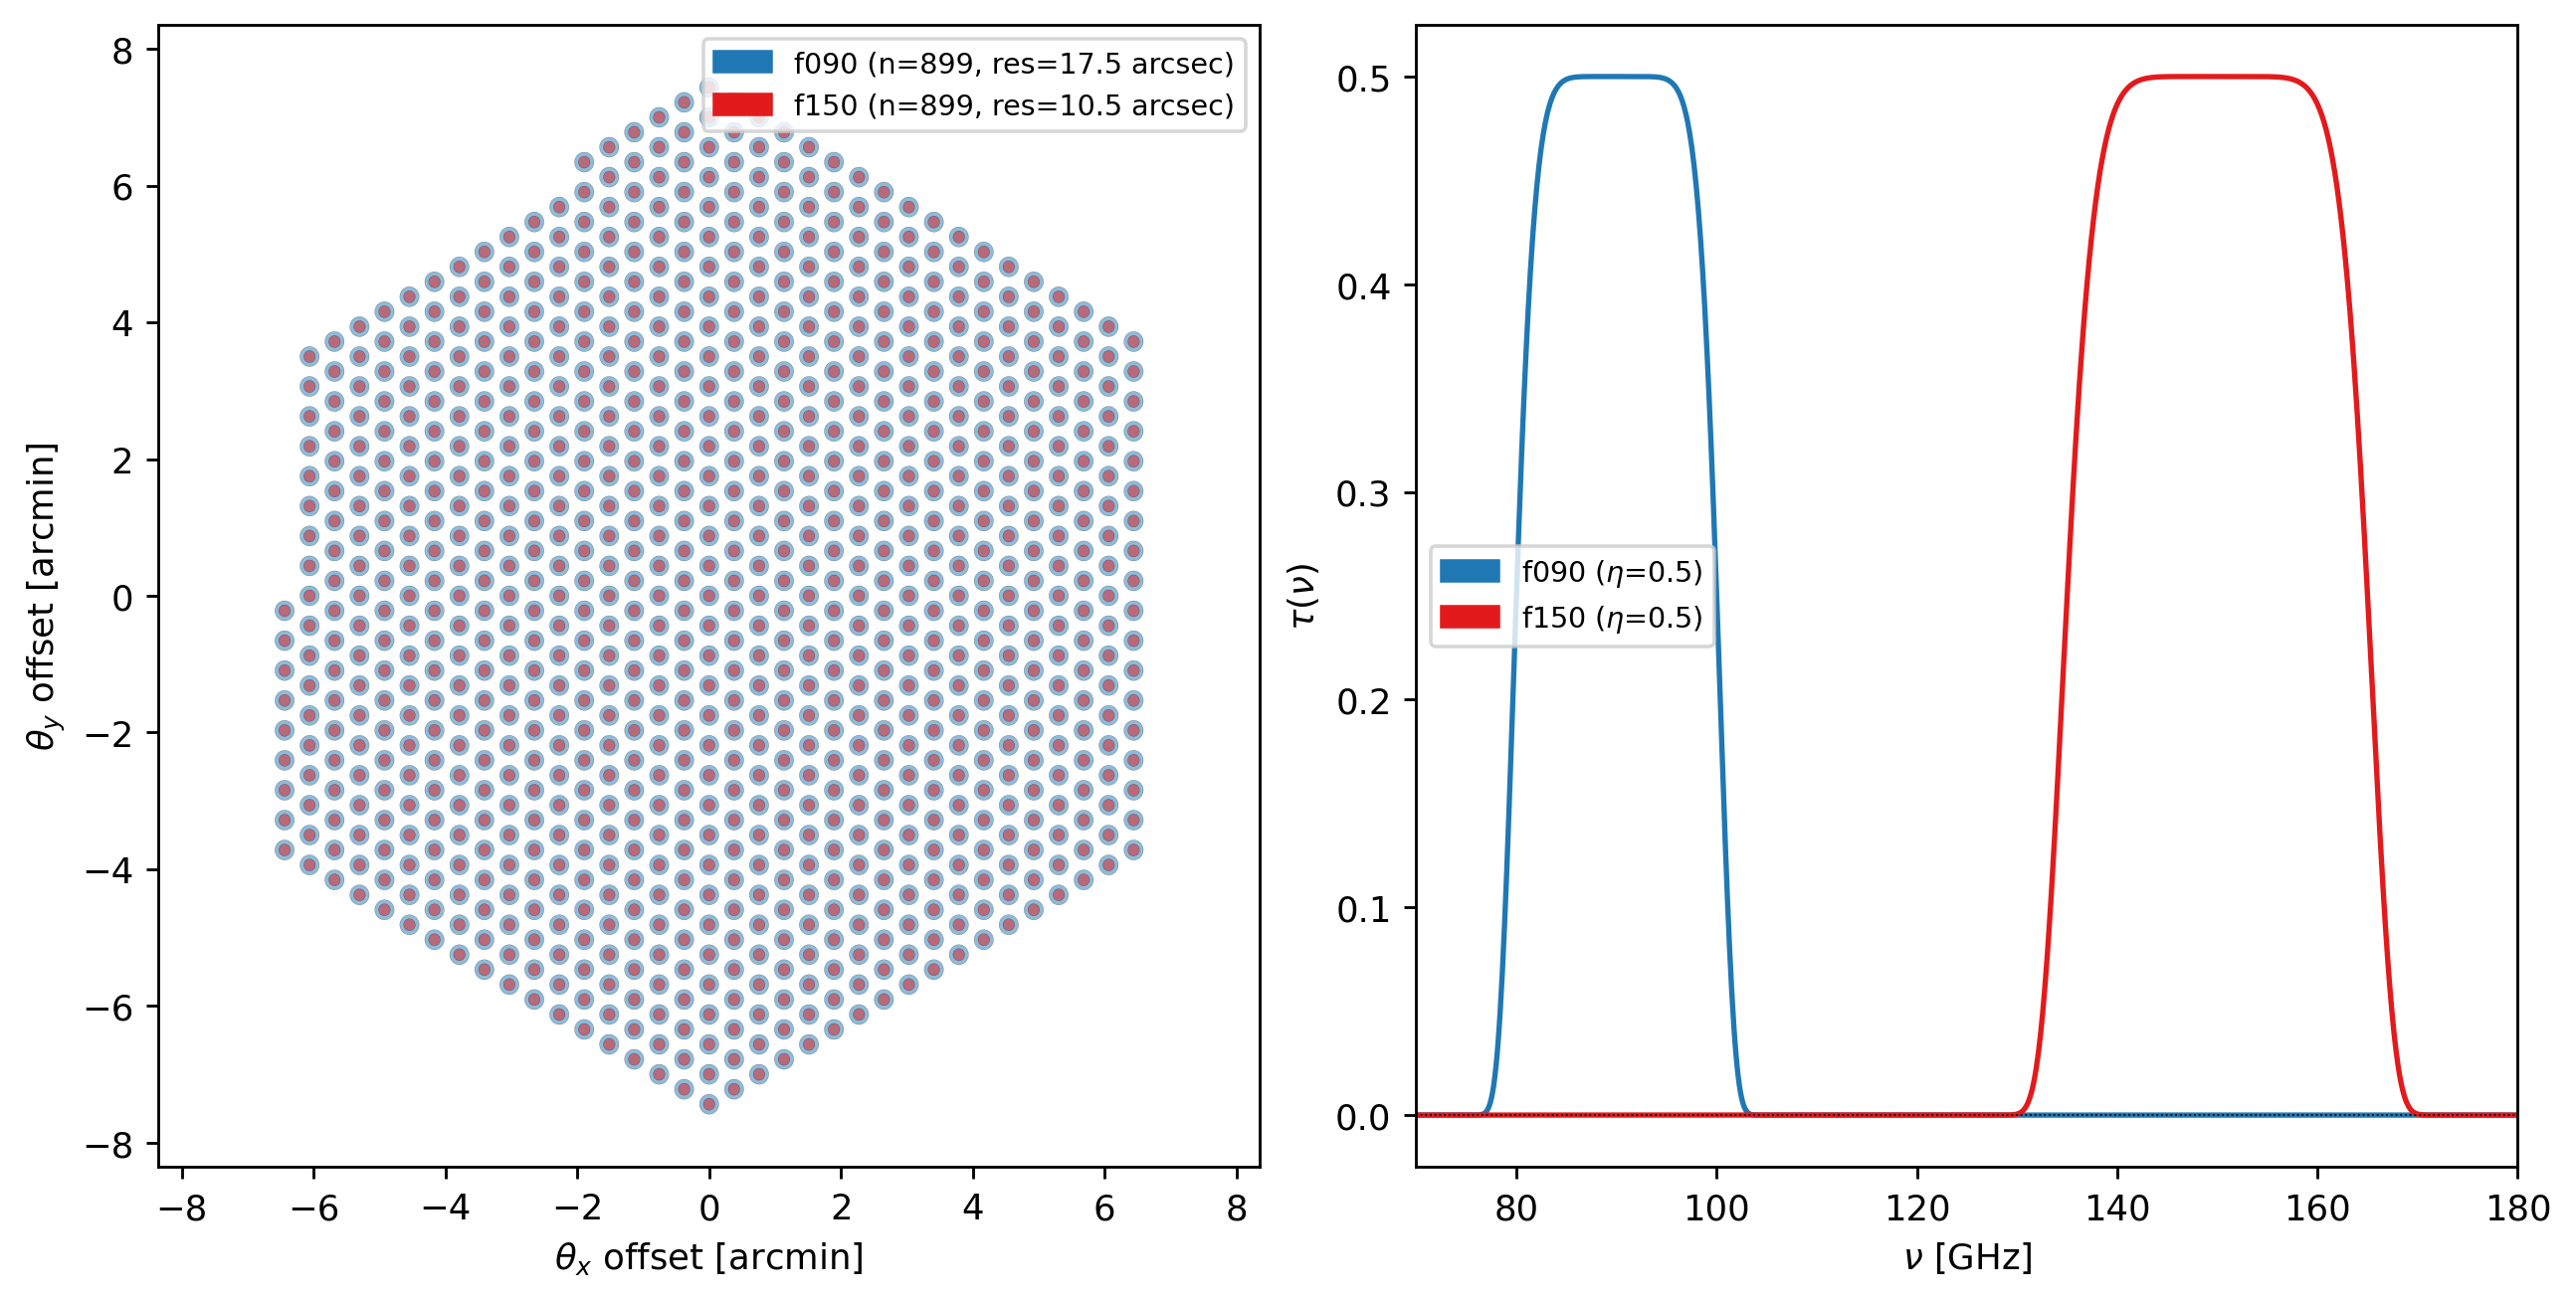

In [2]:
array = {"field_of_view": 0.25, "primary_size": 50, "bands": [f090, f150]}

instrument = maria.get_instrument(array=array)

print(instrument)
instrument.plot()

As something to observe, we can download a map and construct a `map`. We also define a plan to do a daisy scan centered on the center of the map.

ProjectedMap:
  shape[stokes, nu, t, y, x]: (1, 1, 1, 1024, 1024)
  stokes: ['I']
  nu: [150.] GHz
  t: [1.74284798e+09] s
  quantity: spectral_flux_density_per_pixel
  units: Jy/pixel
  width: 30 arcmin
  height: 31.42 arcsec
  center:
    ra: 19ʰ24ᵐ37.44ˢ
    dec: -31°13’47”
  resolution: 1.758 arcsec


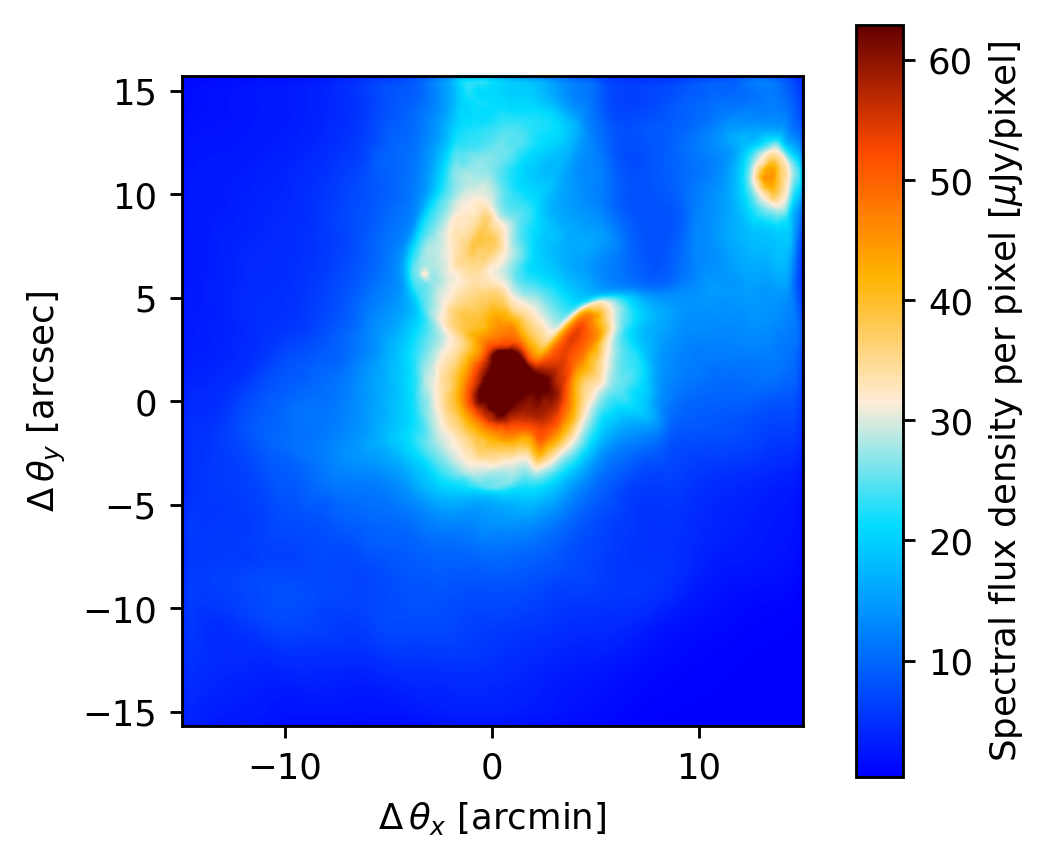

In [3]:
from maria.io import fetch

map_filename = fetch("maps/big_cluster.h5")

input_map = maria.map.load(
    filename=map_filename,
    nu=150e9,
    width=0.5,
    center=(291.156, -31.23),
    units="Jy/pixel")

print(input_map)
input_map.plot()

Site:
  region: chajnantor
  location: 1319°29’14”S 3882°3’50”W
  altitude: 5.065 km
  seasonal: True
  diurnal: True


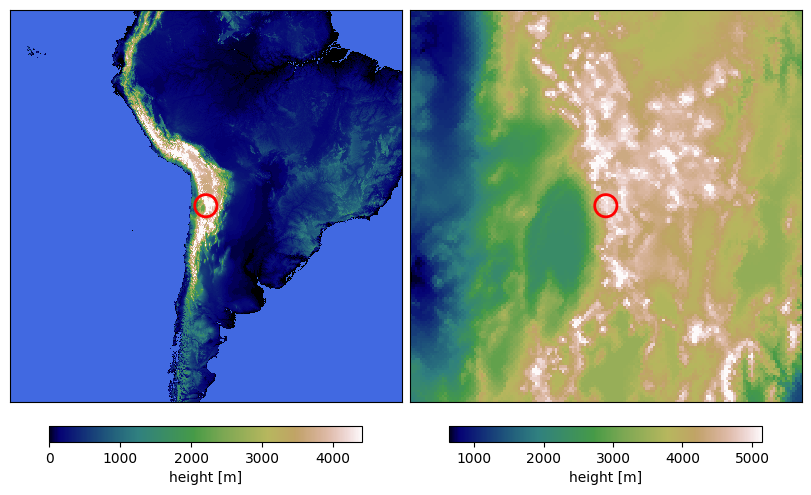

In [4]:
site = maria.get_site("llano_de_chajnantor", altitude=5065)

print(site)
site.plot()

Plan:
  start_time: 2024-08-06 03:00:00.000 +00:00
  duration: 900 s
  sample_rate: 50 Hz
  center:
    ra: 19ʰ24ᵐ37.44ˢ
    dec: -31°13’47”
  scan_pattern: daisy
  scan_kwargs: {'radius': 0.1, 'speed': 0.02}


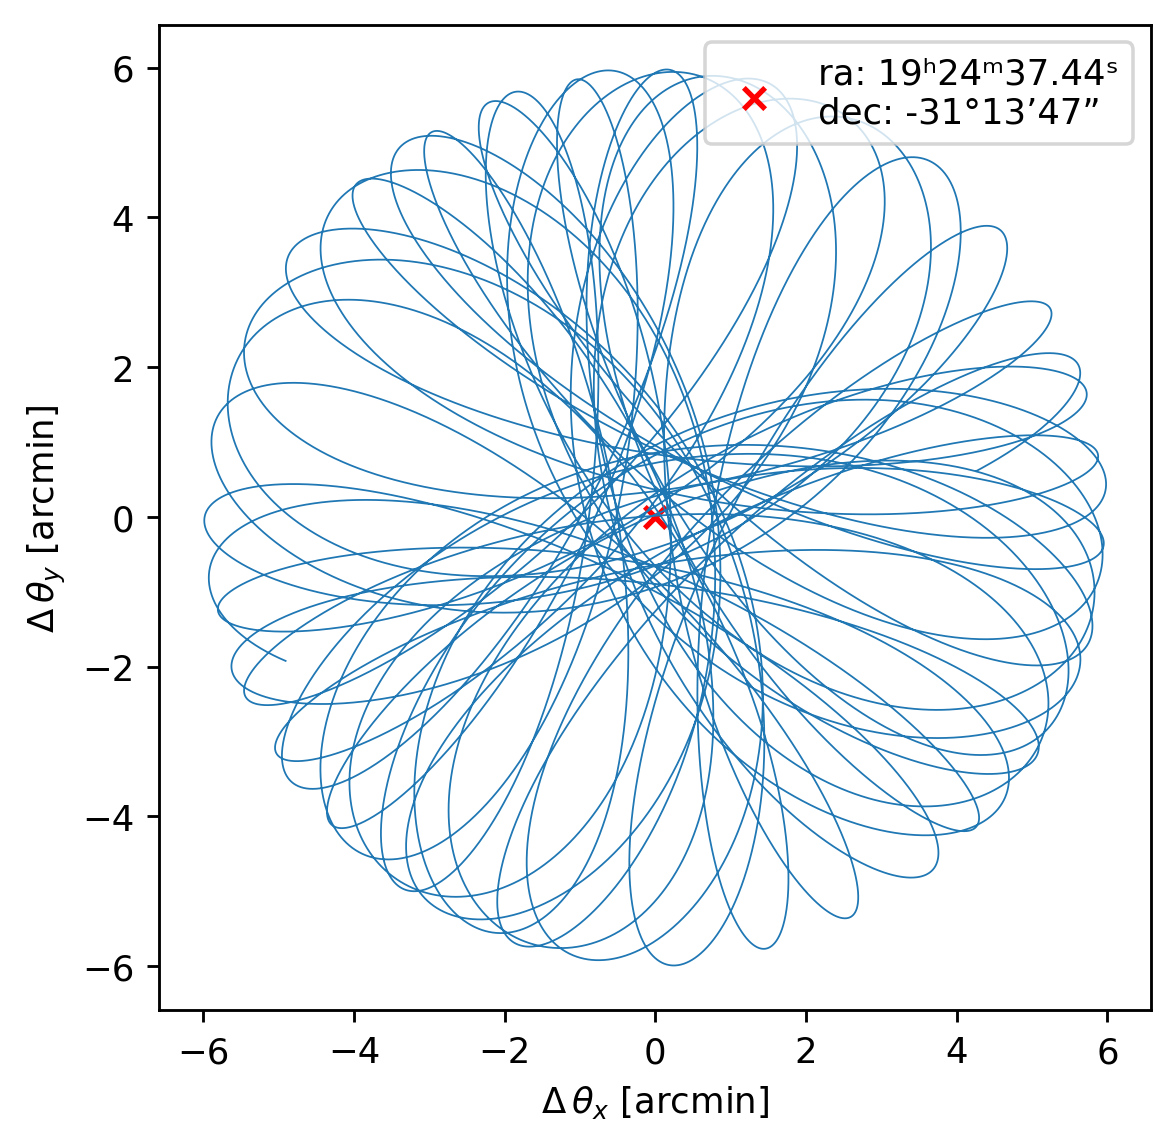

In [5]:
plan = maria.Plan(
    start_time="2024-08-06T03:00:00",
    scan_pattern="daisy",
    scan_options={"radius": 0.1, "speed": 0.02},  # in degrees
    duration=900,  # in seconds
    sample_rate=50,  # in Hz
    scan_center=(291.156, -31.23),
    frame="ra_dec")

print(plan)
plan.plot()

In [6]:
sim = maria.Simulation(
    instrument,
    plan=plan,
    site="llano_de_chajnantor",
    atmosphere="2d",
    atmosphere_kwargs={"weather": {"pwv": 0.5}},
    map=input_map)

print(sim)

Constructing atmosphere:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing atmosphere:  17%|█▋        | 1/6 [00:01<00:05,  1.17s/it]

Constructing atmosphere:  33%|███▎      | 2/6 [00:02<00:04,  1.19s/it]

Constructing atmosphere:  50%|█████     | 3/6 [00:03<00:04,  1.34s/it]

Constructing atmosphere:  67%|██████▋   | 4/6 [00:05<00:02,  1.30s/it]

Constructing atmosphere:  83%|████████▎ | 5/6 [00:06<00:01,  1.44s/it]

Constructing atmosphere: 100%|██████████| 6/6 [00:08<00:00,  1.37s/it]

Constructing atmosphere: 100%|██████████| 6/6 [00:08<00:00,  1.34s/it]

Simulation
├ Instrument(1 array)
│ ├ arrays:
│ │             n           FOV baseline        bands
│ │  array1  1798  14.87 arcmin      0 m  [f090,f150]
│ │ 
│ └ bands:
│           center   width    η         NEP   NET_RJ     NET_CMB
│    f090   90 GHz  20 GHz  0.5  5.445 aW√s  40 uK√s  49.13 uK√s
│    f150  150 GHz  30 GHz  0.5  12.25 aW√s  60 uK√s    104 uK√s
├ Site:
│   region: chajnantor
│   location: 1319°29’14”S 3882°3’50”W
│   altitude: 5.064 km
│   seasonal: True
│   diurnal: True
├ Plan:
│   start_time: 2024-08-06 03:00:00.000 +00:00
│   duration: 900 s
│   sample_rate: 50 Hz
│   center:
│     ra: 19ʰ24ᵐ37.44ˢ
│     dec: -31°13’47”
│   scan_pattern: daisy
│   scan_kwargs: {'radius': 0.1, 'speed': 0.02}
├ Atmosphere(6 processes with 6 layers):
│ ├ spectrum:
│ │   region: chajnantor
│ └ weather:
│     region: chajnantor
│     altitude: 5.064 km
│     time: Aug 5 23:07:29 -04:00
│     pwv[mean, rms]: (500 um, 15 um)
└ ProjectedMap:
    shape[stokes, nu, t, y, x]: (1, 1, 1, 1024, 

Generating turbulence:   0%|          | 0/6 [00:00<?, ?it/s]

Generating turbulence:  50%|█████     | 3/6 [00:00<00:00, 25.17it/s]

Generating turbulence: 100%|██████████| 6/6 [00:00<00:00, 18.27it/s]

Generating turbulence: 100%|██████████| 6/6 [00:00<00:00, 19.02it/s]

Sampling turbulence:   0%|          | 0/6 [00:00<?, ?it/s]

Sampling turbulence:  17%|█▋        | 1/6 [00:01<00:07,  1.53s/it]

Sampling turbulence:  33%|███▎      | 2/6 [00:03<00:06,  1.57s/it]

Sampling turbulence:  50%|█████     | 3/6 [00:04<00:04,  1.58s/it]

Sampling turbulence:  67%|██████▋   | 4/6 [00:06<00:03,  1.58s/it]

Sampling turbulence:  83%|████████▎ | 5/6 [00:07<00:01,  1.62s/it]

Sampling turbulence: 100%|██████████| 6/6 [00:09<00:00,  1.62s/it]

Sampling turbulence: 100%|██████████| 6/6 [00:09<00:00,  1.60s/it]

Computing atmospheric emission:   0%|          | 0/2 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|          | 0/2 [00:00<?, ?it/s, band=f090]

Computing atmospheric emission:  50%|█████     | 1/2 [00:07<00:07,  7.90s/it, band=f090]

Computing atmospheric emission:  50%|█████     | 1/2 [00:07<00:07,  7.90s/it, band=f150]

Computing atmospheric emission: 100%|██████████| 2/2 [00:14<00:00,  7.33s/it, band=f150]

Computing atmospheric emission: 100%|██████████| 2/2 [00:14<00:00,  7.42s/it, band=f150]

Sampling map:   0%|          | 0/2 [00:00<?, ?it/s]

Sampling map:   0%|          | 0/2 [00:00<?, ?it/s, band=f090]

Sampling map:  50%|█████     | 1/2 [00:24<00:24, 24.50s/it, band=f090]

Sampling map:  50%|█████     | 1/2 [00:24<00:24, 24.50s/it, band=f150]

Sampling map: 100%|██████████| 2/2 [00:50<00:00, 25.30s/it, band=f150]

Sampling map: 100%|██████████| 2/2 [00:50<00:00, 25.18s/it, band=f150]

Generating noise:   0%|          | 0/2 [00:00<?, ?it/s]

Generating noise:   0%|          | 0/2 [00:00<?, ?it/s, band=f090]

Generating noise:  50%|█████     | 1/2 [00:02<00:02,  2.93s/it, band=f090]

Generating noise:  50%|█████     | 1/2 [00:02<00:02,  2.93s/it, band=f150]

Generating noise: 100%|██████████| 2/2 [00:05<00:00,  2.92s/it, band=f150]

Generating noise: 100%|██████████| 2/2 [00:05<00:00,  2.92s/it, band=f150]

TOD(shape=(1798, 45000), fields=['atmosphere', 'map', 'noise'], units='pW', start=2024-08-06 03:14:59.979 +00:00, duration=900.0s, sample_rate=50.0Hz, metadata={'atmosphere': True, 'sim_time': <Arrow [2025-04-01T18:31:22.802033+00:00]>, 'altitude': 5064.0, 'region': 'chajnantor', 'pwv': 0.5, 'base_temperature': 272.523})


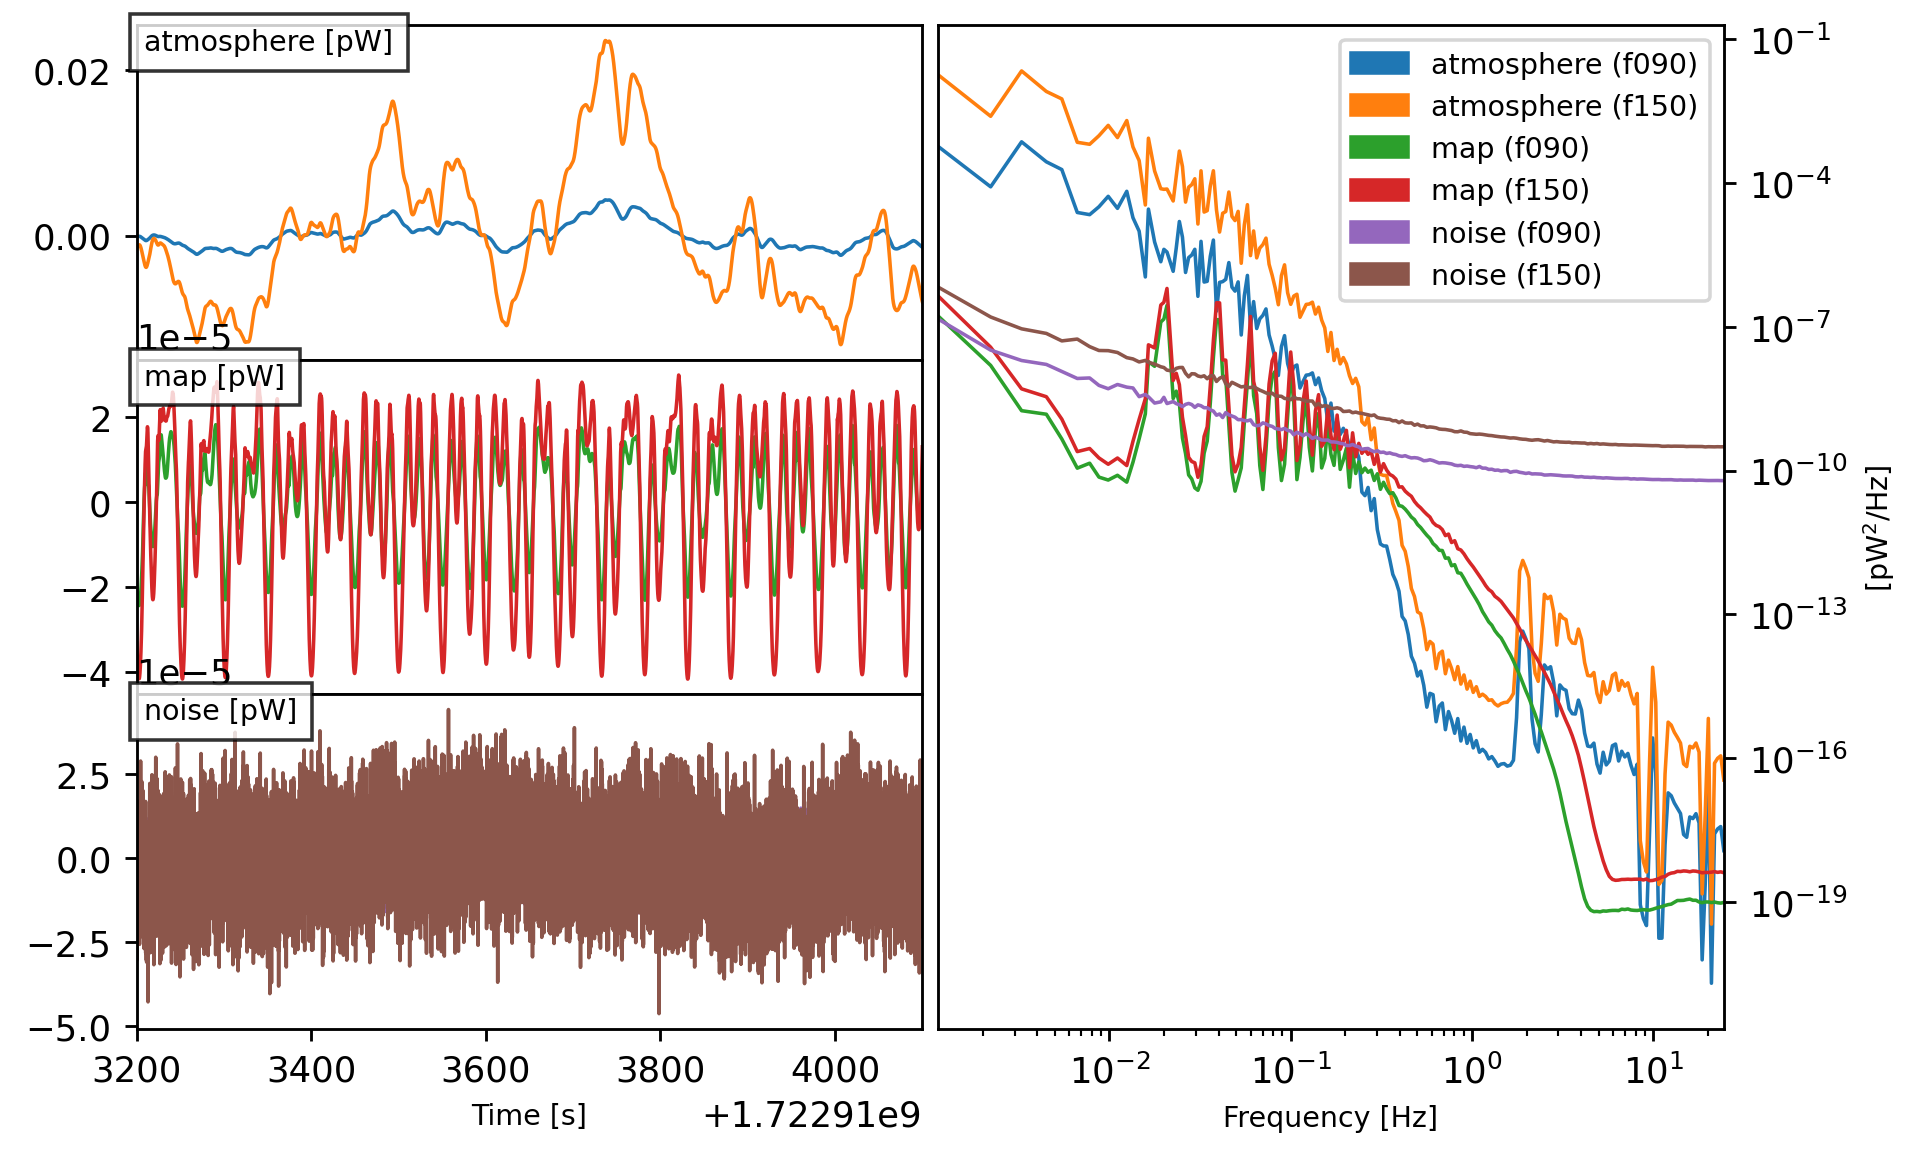

In [7]:
tod = sim.run()

print(tod)
tod.plot()

2025-04-01 18:32:19.486 INFO: Ran mapper for band f090 in 39.17 s.


2025-04-01 18:32:58.538 INFO: Ran mapper for band f150 in 39.05 s.


ProjectedMap:
  shape[stokes, nu, t, y, x]: (1, 2, 1, 200, 200)
  stokes: ['I']
  nu: [ 90. 150.] GHz
  t: [1.74353238e+09] s
  quantity: rayleigh_jeans_temperature
  units: mK_RJ
  width: 30 arcmin
  height: 30 arcmin
  center:
    ra: 19ʰ24ᵐ37.44ˢ
    dec: -31°13’48”
  resolution: 9 arcsec


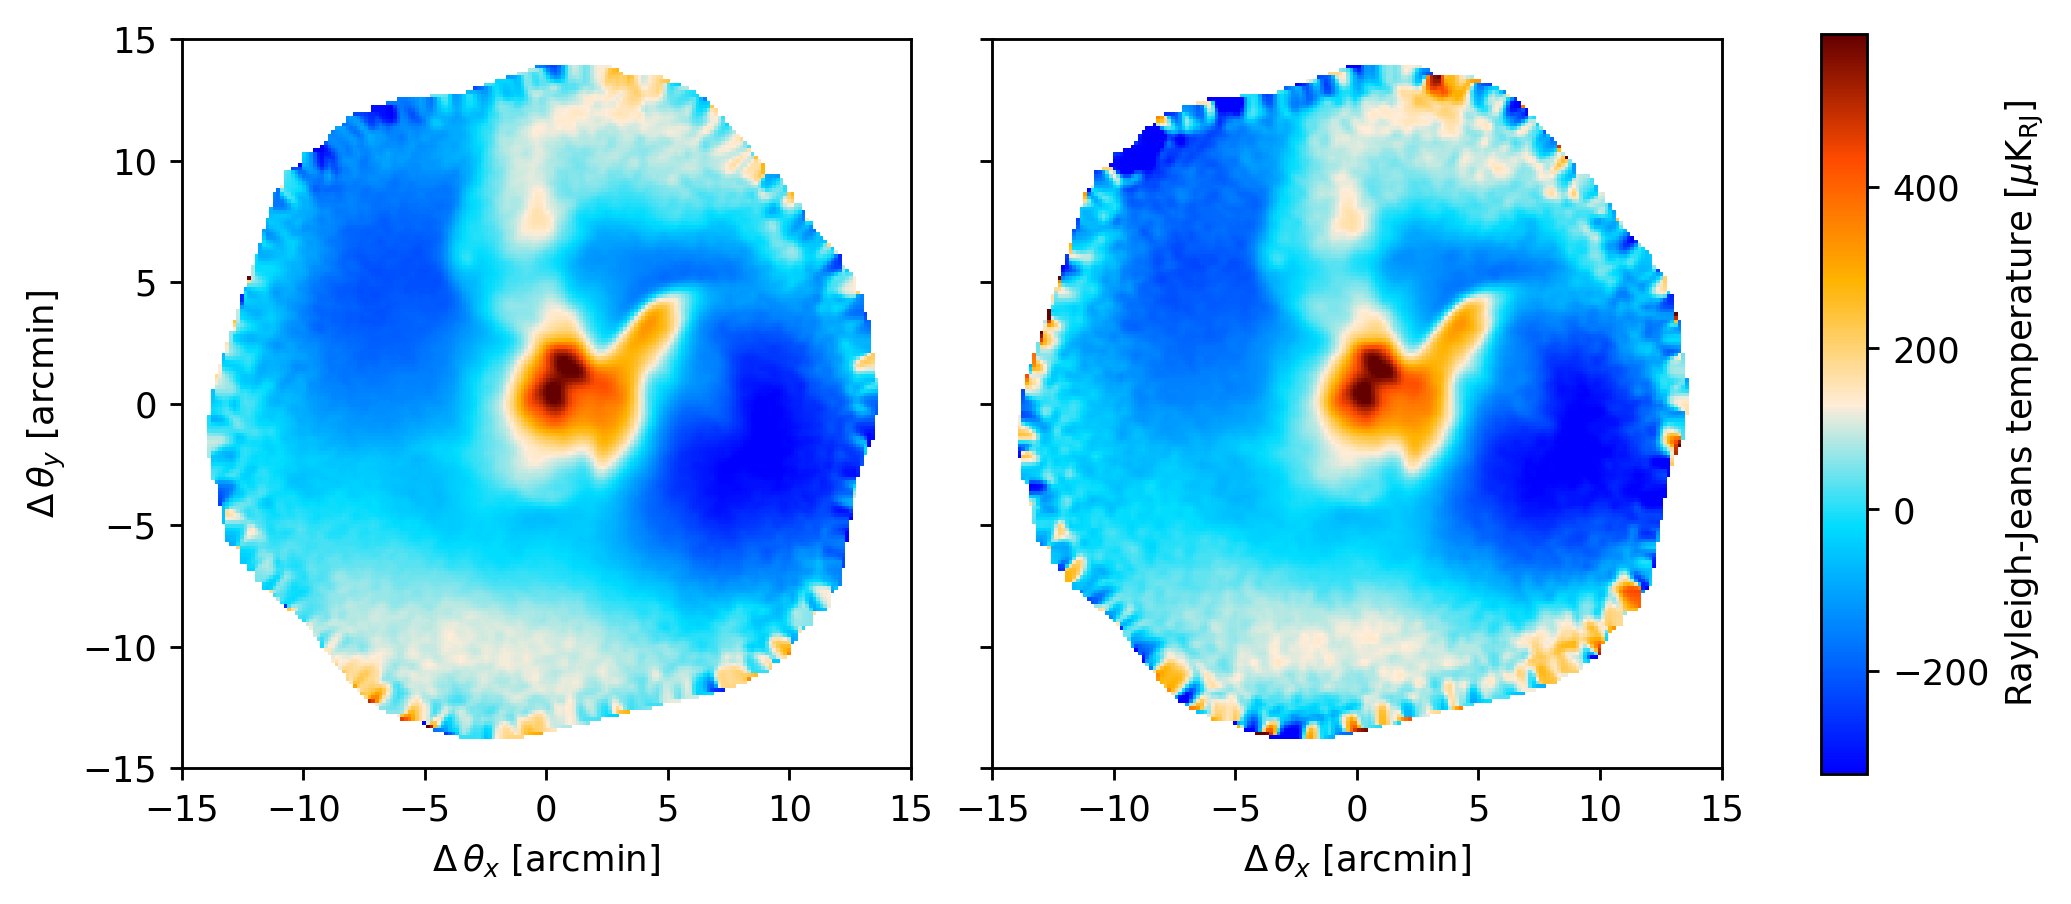

In [8]:
from maria.mappers import BinMapper

mapper = BinMapper(
    center=(291.156, -31.23),
    frame="ra_dec",
    width=0.5,
    height=0.5,
    resolution=0.5 / 200,
    tod_preprocessing={
        "window": {"name": "tukey", "kwargs": {"alpha": 0.1}},
        "remove_spline": {"knot_spacing": 30, "remove_el_gradient": True},
        "remove_modes": {"modes_to_remove": [0]},
    },
    map_postprocessing={
        "gaussian_filter": {"sigma": 1},
        "median_filter": {"size": 1},
    },
    units="mK_RJ",
)

mapper.add_tods(tod)

output_map = mapper.run()
print(output_map)
output_map.plot()